# Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.

In [9]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Linear Regression (Boston Housing)
1. Uses all features to predict house prices
2. Shows:
    - Training and test MSE (Mean Squared Error)
    - R² scores for model evaluation
    - Feature importance visualization

Part 1: Linear Regression - Boston Housing Dataset
--------------------------------------------------
Linear Regression Results:
Training MSE: 21.64
Test MSE: 24.29
Training R²: 0.75
Test R²: 0.67


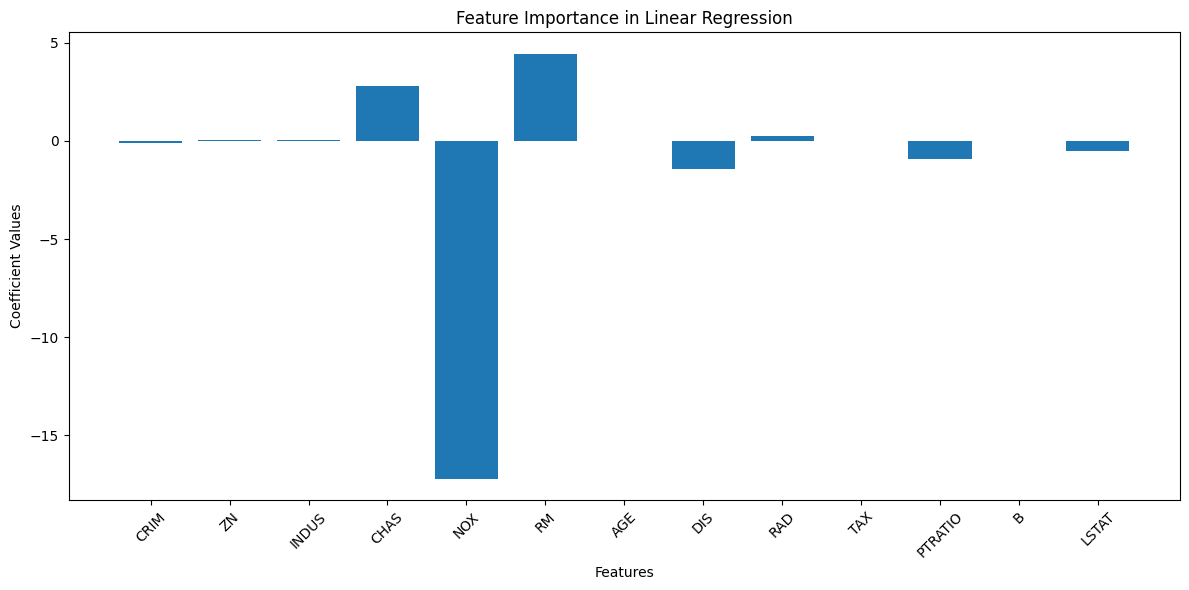

In [11]:
# Part 1: Linear Regression with Boston Housing Dataset
print("Part 1: Linear Regression - Boston Housing Dataset")
print("-" * 50)

# Load Boston Housing dataset
housing = pd.read_csv('housing.csv')
X_boston = housing.drop('MEDV', axis=1)
y_boston = housing['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print results
print("Linear Regression Results:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")

# Visualize feature importance  
plt.figure(figsize=(12, 6))  
plt.bar(X_boston.columns, lr_model.coef_)  
plt.xticks(rotation=45)  
plt.title('Feature Importance in Linear Regression')  
plt.xlabel('Features')  
plt.ylabel('Coefficient Values')  
plt.tight_layout()  
plt.show()  

## Features in the Boston Housing dataset:
1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. INDUS: Proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: Nitric oxides concentration (parts per 10 million)
6. RM: Average number of rooms per dwelling
7. AGE: Proportion of owner-occupied units built prior to 1940
8. DIS: Weighted distances to five Boston employment centers
9. RAD: Index of accessibility to radial highways
10. TAX: Full-value property tax rate per `$10,000`
11. PTRATIO: Pupil-teacher ratio by town
12. B: $1000(Bk−0.63)^2$ where Bk is the proportion of Black residents by town
13. LSTAT: Percentage of lower status of the population
14. MEDV: Median value of owner-occupied homes in `$1000s`

## Part 2: Polynomial Regression (Auto MPG)
1. Uses horsepower to predict MPG (Miles Per Gallon)
2. Tests three polynomial degrees (1, 2, and 3)
3. Shows:
    - Scatter plot of actual data
    - Fitted polynomial curves
    - R² scores for each degree


Part 2: Polynomial Regression - Auto MPG Dataset
--------------------------------------------------


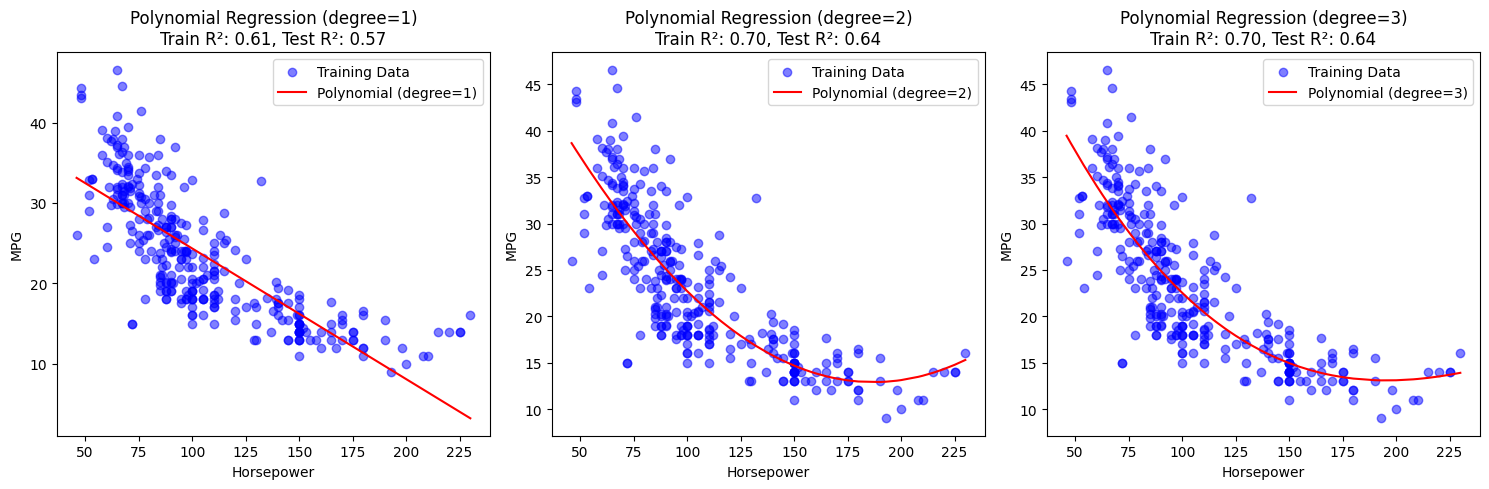

In [14]:
# Part 2: Polynomial Regression with Auto MPG Dataset
print("\nPart 2: Polynomial Regression - Auto MPG Dataset")
print("-" * 50)

# Load Auto MPG dataset (using horsepower to predict mpg)
auto_mpg = 'auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(auto_mpg, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Clean the data
df = df.dropna()
X_mpg = df['Horsepower'].values.reshape(-1, 1)
y_mpg = df['MPG'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_mpg, y_mpg, test_size=0.2, random_state=42)

# Create polynomial features
degrees = [1, 2, 3]  # Test different polynomial degrees
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred_train = poly_model.predict(X_train_poly)
    y_pred_test = poly_model.predict(X_test_poly)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Plot results
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    
    # Sort X values for smooth curve
    X_sort = np.sort(X_train, axis=0)
    X_sort_poly = poly_features.transform(X_sort)
    y_smooth = poly_model.predict(X_sort_poly)
    
    plt.plot(X_sort, y_smooth, color='red', label=f'Polynomial (degree={degree})')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Polynomial Regression (degree={degree})\nTrain R²: {train_r2:.2f}, Test R²: {test_r2:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

## Key Insights:
1. Linear Regression:
    - Shows which features most influence house prices
    - Provides simple interpretable model
2. Polynomial Regression:
    - Higher degrees can capture nonlinear relationships
    - Risk of overfitting with too high degrees
    - Trade-off between complexity and accuracy